<center>
<font size="6">Análisis exploratorio de datos para armar un sistema de recomendación de películas</font>
</center>


In [43]:
#Cargo las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#Cargo el archivo parquet producto del ETL

df_peliculas = pd.read_parquet("C:/Users/jugas/Proyecto/Proyecto/data/info_peliculas.parquet")


In [45]:
#Comienzo inspeccionando lo básico
df_peliculas.head()

,budget,genres,id,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,...,title,vote_average,vote_count,release_year,return,character,name_actor,department,job,name_director
1,0.0,"[Drama, Crime]",2.0,fi,Taisto Kasurinen is a Finnish coal miner whose...,3.860491,1988-10-21,0.0,69.0,"[suomi, Deutsch]",...,Ariel,7.1,44.0,1988.0,0.000000,Luke Skywalker,Mark Hamill,Directing,Director,Mark Hamill
2,0.0,"[Drama, Comedy]",3.0,fi,"An episode in the life of Nikander, a garbage ...",2.292110,1986-10-16,0.0,76.0,"[English, suomi, svenska]",...,Shadows in Paradise,7.1,35.0,1986.0,0.000000,Linus Larrabee,Harrison Ford,Production,Executive Producer,Harrison Ford
4,4000000.0,"[Crime, Comedy]",5.0,en,It's Ted the Bellhop's first night on the job....,9.026586,1995-12-09,4300000.0,98.0,[English],...,Four Rooms,6.5,539.0,1995.0,1.075000,Grand Moff Tarkin,Peter Cushing,None,None,None
5,0.0,"[Action, Thriller, Crime]",6.0,en,"While racing to a boxing match, Frank, Mike, J...",5.538671,1993-10-15,12136938.0,110.0,[English],...,Judgment Night,6.4,79.0,1993.0,inf,See Threepio (C-3PO),Anthony Daniels,None,None,None
10,11000000.0,"[Adventure, Action, Science Fiction]",11.0,en,Princess Leia is captured and held hostage by ...,42.149697,1977-05-25,775398007.0,121.0,[English],...,Star Wars,8.1,6778.0,1977.0,70.490728,Hansel,David Reynolds,Writing,Screenplay,David Reynolds


In [46]:
print(df_peliculas.info())

<class 'pandas.core.frame.DataFrame'>
Index: 45430 entries, 1 to 141224
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45430 non-null  float64
 1   genres             45430 non-null  object 
 2   id                 45430 non-null  float64
 3   original_language  45419 non-null  object 
 4   overview           44476 non-null  object 
 5   popularity         45430 non-null  float64
 6   release_date       45346 non-null  object 
 7   revenue            45430 non-null  float64
 8   runtime            45173 non-null  float64
 9   spoken_languages   45430 non-null  object 
 10  status             45349 non-null  object 
 11  tagline            20401 non-null  object 
 12  title              45430 non-null  object 
 13  vote_average       45430 non-null  float64
 14  vote_count         45430 non-null  float64
 15  release_year       45346 non-null  float64
 16  return             45430 n

In [47]:
#Verifico los valores nulos
print(df_peliculas.isnull().sum())

budget                   0
genres                   0
id                       0
original_language       11
overview               954
popularity               0
release_date            84
revenue                  0
runtime                257
spoken_languages         0
status                  81
tagline              25029
title                    0
vote_average             0
vote_count               0
release_year            84
return                   0
character            30312
name_actor           30312
department           33682
job                  33682
name_director        33682
dtype: int64


<center>
<font size="4">Implemento algunas transformaciones basada en lo que voy observando</font>
</center>


In [48]:
#Elimino los registros que corresponden a un runtime NaN
df_peliculas = df_peliculas.dropna(subset=['runtime'])

In [49]:
# Elimino las filas donde "runtime" es menor a 50
df_peliculas = df_peliculas[df_peliculas['runtime'] >= 50]

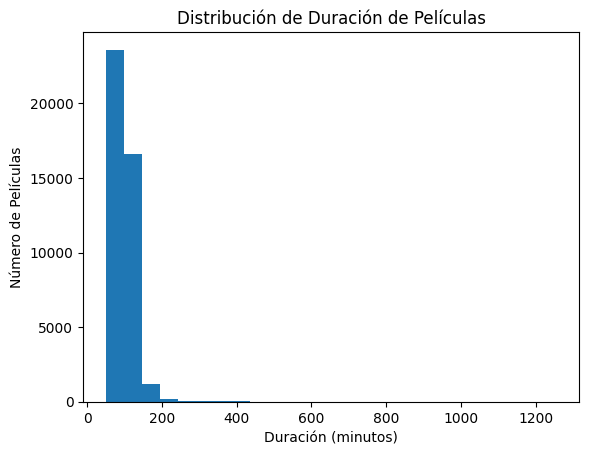

In [50]:
#Grafico la distribucion de la duracion de las peliculas
 
plt.hist(df_peliculas['runtime'], bins=25) 
plt.xlabel('Duración (minutos)')
plt.ylabel('Número de Películas')
plt.title('Distribución de Duración de Películas')
plt.show()

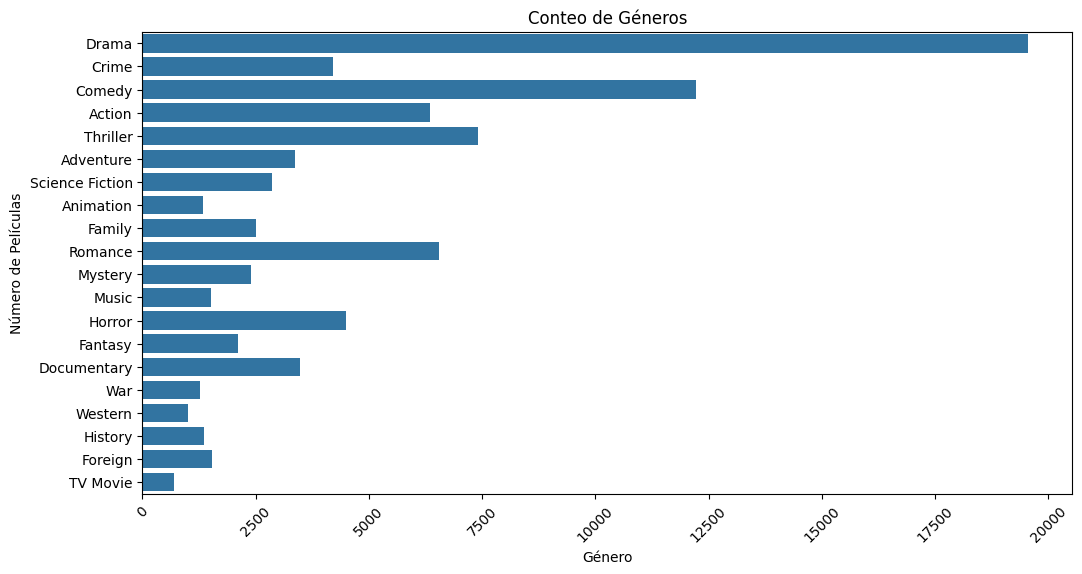

In [51]:
#Conteo de los géneros 

plt.figure(figsize=(12, 6))
sns.countplot(df_peliculas['genres'].explode())
plt.xticks(rotation=45)
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.title('Conteo de Géneros')
plt.show()

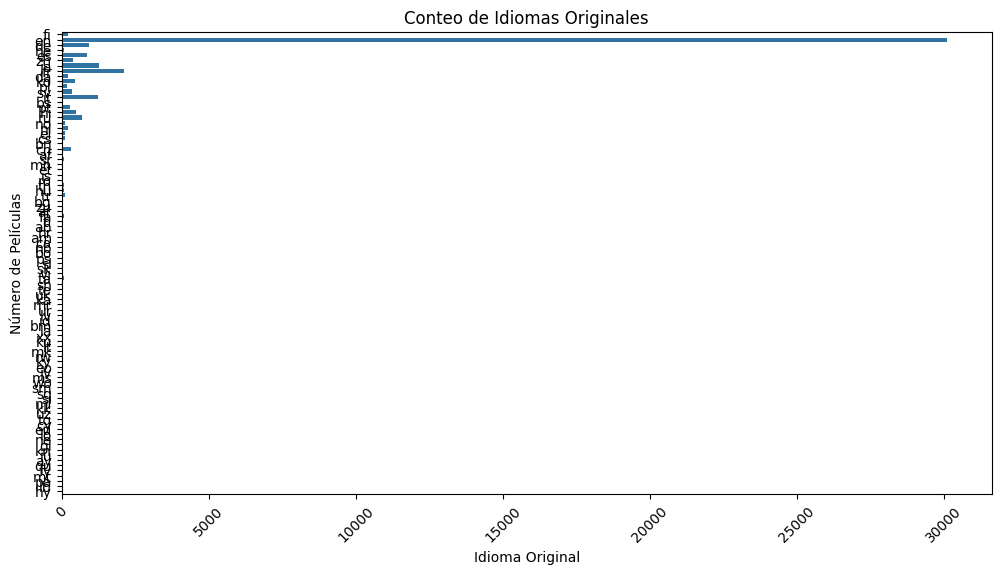

In [52]:
#Conteo de los idiomas originales

plt.figure(figsize=(12, 6))
sns.countplot(df_peliculas['original_language'])
plt.xticks(rotation=45)
plt.xlabel('Idioma Original')
plt.ylabel('Número de Películas')
plt.title('Conteo de Idiomas Originales')
plt.show()

In [53]:
#Conteo de la frecuencia de cada idioma original
conteo_idiomas = df_peliculas['original_language'].value_counts()

In [54]:
#Selecciono los 10 idiomas más frecuentes
idiomas_frecuentes = conteo_idiomas.head(10).index 


In [55]:
# Filtro el DataFrame original para dejar solo las peliculas incluidas en los idiomas mas frecuentes
df_peliculas = df_peliculas[df_peliculas['original_language'].isin(idiomas_frecuentes)]

In [56]:
# Creo una máscara booleana para identificar las filas a eliminar
mask = ~df_peliculas['original_language'].isin(idiomas_frecuentes)

# Elimino las filas que no cumplen la condición
df_peliculas.drop(df_peliculas[mask].index, inplace=True)

In [57]:
# Calculo la correlación entre las columnas 'runtime' y 'budget' directamente
correlacion = df_peliculas['runtime'].corr(df_peliculas['budget'])

print("La correlación entre duración y presupuesto es:", correlacion)

La correlación entre duración y presupuesto es: 0.12371875925201463


In [58]:
# Convierto la columna 'budget' a float
df_peliculas['budget'] = df_peliculas['budget'].astype(float)

In [59]:
# Calculo la correlación entre las columnas 'return' y 'budget' directamente
correlacion = df_peliculas['return'].corr(df_peliculas['budget'])

print("La correlación entre retorno de inversión y presupuesto es:", correlacion)

La correlación entre retorno de inversión y presupuesto es: nan


c:\Users\jugas\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [60]:
# Verifico el tipo de dato de la columna "return"
print(df_peliculas['return'].dtype)

# Convierto a numérico si es necesario
df_peliculas['return'] = pd.to_numeric(df_peliculas['return'], errors='coerce')

# Conteo de valores infinitos
cantidad_inf = df_peliculas[np.isinf(df_peliculas['return'])].shape[0]
print(f"Cantidad de registros con infinito: {cantidad_inf}")


float64
Cantidad de registros con infinito: 1905


In [61]:
# Elimino filas con valores infinitos
df_peliculas = df_peliculas[~np.isinf(df_peliculas['return'])]

In [62]:
# Calculo la correlación entre las columnas 'return' y 'budget' directamente
correlacion = df_peliculas['return'].corr(df_peliculas['budget'])

print("La correlación entre retorno de inversión y presupuesto es:", correlacion)

La correlación entre retorno de inversión y presupuesto es: -0.00263151442763114


In [63]:
# Identifico las películas que tienen un runtime mayor a 330 (porque quiere decir que son miniseries y no quiero que esten en mi análisis)
peliculas_a_eliminar = df_peliculas[df_peliculas['runtime'] > 330]['id'].unique()

# Filtro el df y lo reescribo
df_peliculas.drop(df_peliculas[df_peliculas['id'].isin(peliculas_a_eliminar)].index, inplace=True)


print(df_peliculas)

            budget                                genres        id  \
4        4000000.0                       [Crime, Comedy]       5.0   
10      11000000.0  [Adventure, Action, Science Fiction]      11.0   
11      94000000.0                   [Animation, Family]      12.0   
12      55000000.0              [Comedy, Drama, Romance]      13.0   
13      15000000.0                               [Drama]      14.0   
...            ...                                   ...       ...   
141175         0.0                     [TV Movie, Drama]  462788.0   
141186         0.0            [Action, Adventure, Crime]  463906.0   
141191         0.0                         [Documentary]  464207.0   
141197         0.0                      [Fantasy, Drama]  465044.0   
141215         0.0                               [Drama]  467731.0   

       original_language                                           overview  \
4                     en  It's Ted the Bellhop's first night on the job....   
1

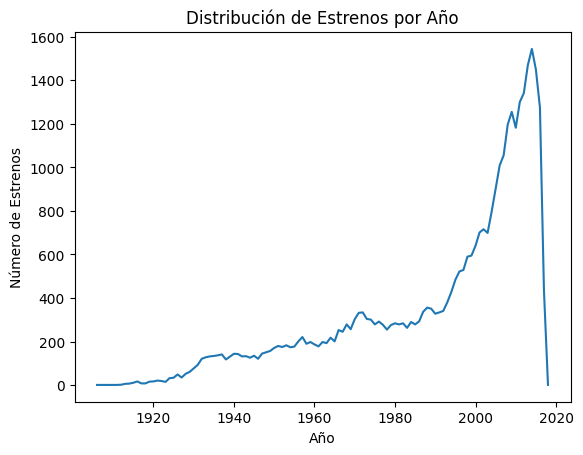

In [64]:
#Armo un gráfico de lineas para ver la distribución de estrenos anuales a lo largo del tiempo
df_agrupado = df_peliculas.groupby('release_year')['title'].count().reset_index(name='num_estrenos')

# Gráfico de línea
sns.lineplot(x='release_year', y='num_estrenos', data=df_agrupado)
plt.title('Distribución de Estrenos por Año')
plt.xlabel('Año')
plt.ylabel('Número de Estrenos')
plt.show()

In [65]:
# Filtro las películas estrenadas a partir de 1980 
df_peliculas = df_peliculas[df_peliculas['release_year'] >= 1980]

In [66]:
#Elimino columnas que me parecen instrascendentes para el modelo
df_peliculas = df_peliculas.drop(['tagline','character', 'job', 'spoken_languages'], axis=1)

In [67]:
# Calculo la correlación entre las columnas 'return' y 'budget' directamente
correlacion = df_peliculas['return'].corr(df_peliculas['budget'])

print("La correlación entre retorno de inversión y presupuesto es:", correlacion)

La correlación entre retorno de inversión y presupuesto es: -0.0030710118235697447


In [68]:
df_genres_dummies = pd.DataFrame({'genres': ['Comedy,Drama', 'Action,Adventure','Crime,Thriller', 'War,Foreign','Science Fiction,Mystery', 'Animation,Family', "Fantasy,Romance", "Horror,History", "Music,Documentary", "Western,TV Movie"]})
df_genres_dummies = df_genres_dummies['genres'].str.get_dummies(sep=',')
print(df_genres_dummies)

   Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  \
0       0          0          0       1      0            0      1       0   
1       1          1          0       0      0            0      0       0   
2       0          0          0       0      1            0      0       0   
3       0          0          0       0      0            0      0       0   
4       0          0          0       0      0            0      0       0   
5       0          0          1       0      0            0      0       1   
6       0          0          0       0      0            0      0       0   
7       0          0          0       0      0            0      0       0   
8       0          0          0       0      0            1      0       0   
9       0          0          0       0      0            0      0       0   

   Fantasy  Foreign  History  Horror  Music  Mystery  Romance  \
0        0        0        0       0      0        0        0   
1        0 

In [69]:
#hago una matriz de dummies para los idiomas frecuentes

df_idiomas_dummies = pd.get_dummies(idiomas_frecuentes)

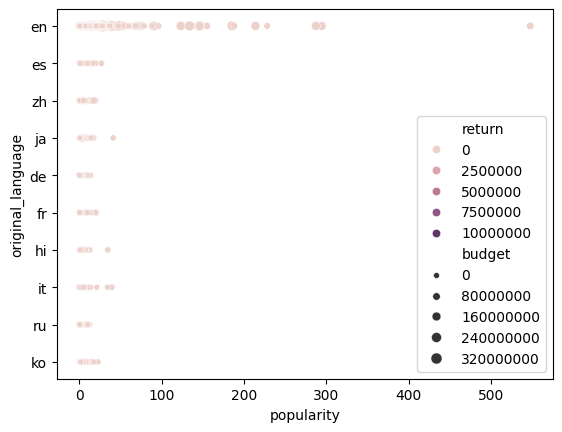

In [70]:
# Armo un grafico que me ayude a ver la relacion entre los idiomas frecuentes y la popularidad, controlando otras variables al mismo tiempo
sns.scatterplot(data=df_peliculas, x="popularity", y="original_language", hue="return", size="budget")
plt.show()

In [71]:
#Elimino los registros cuyo status sea distinto de "Released"
df_peliculas = df_peliculas[df_peliculas['status'] == 'Released']

In [72]:
df_peliculas.head()

,budget,genres,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,release_year,return,name_actor,department,name_director
4,4000000.0,"[Crime, Comedy]",5.0,en,It's Ted the Bellhop's first night on the job....,9.026586,1995-12-09,4300000.0,98.0,Released,Four Rooms,6.5,539.0,1995.0,1.075000,Peter Cushing,None,None
11,94000000.0,"[Animation, Family]",12.0,en,"Nemo, an adventurous young clownfish, is unexp...",25.497794,2003-05-30,940335536.0,100.0,Released,Finding Nemo,7.6,6292.0,2003.0,10.003570,Alexander Gould,None,None
12,55000000.0,"[Comedy, Drama, Romance]",13.0,en,A man with a low IQ has accomplished great thi...,48.307194,1994-07-06,677945399.0,142.0,Released,Forrest Gump,8.2,8147.0,1994.0,12.326280,Albert Brooks,Directing,Albert Brooks
13,15000000.0,[Drama],14.0,en,"Lester Burnham, a depressed suburban father in...",20.726578,1999-09-15,356296601.0,122.0,Released,American Beauty,7.9,3438.0,1999.0,23.753107,Ellen DeGeneres,Writing,Ellen DeGeneres
15,12800000.0,"[Drama, Crime, Music]",16.0,en,"Selma, a Czech immigrant on the verge of blind...",10.684806,2000-05-17,40031879.0,140.0,Released,Dancer in the Dark,7.7,392.0,2000.0,3.127491,None,None,None


In [73]:
# Creo otra máscara temporal para evaluar cuales peliculas tienen un promedio de votos mayor a 7
mask_vote = df_peliculas['vote_average'] > 7

# Aplicamos la máscara al DataFrame
df_peliculas_filtrado = df_peliculas[mask_vote]

(-0.5, 799.5, 399.5, -0.5)

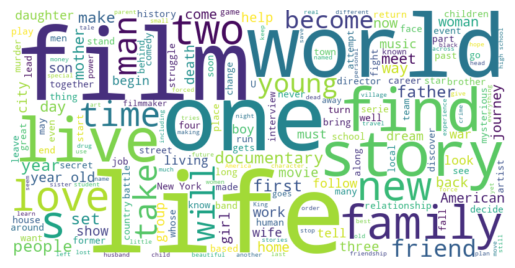

In [74]:
from wordcloud import WordCloud

# Creo una nube de palabras para la columna "tagline" para interpretar gráficamente las palabras más valoradas por los usuarios
text = ' '.join(df_peliculas_filtrado['overview'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [75]:
df_peliculas_filtrado.head()

,budget,genres,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,release_year,return,name_actor,department,name_director
11,94000000.0,"[Animation, Family]",12.0,en,"Nemo, an adventurous young clownfish, is unexp...",25.497794,2003-05-30,940335536.0,100.0,Released,Finding Nemo,7.6,6292.0,2003.0,10.003570,Alexander Gould,None,None
12,55000000.0,"[Comedy, Drama, Romance]",13.0,en,A man with a low IQ has accomplished great thi...,48.307194,1994-07-06,677945399.0,142.0,Released,Forrest Gump,8.2,8147.0,1994.0,12.326280,Albert Brooks,Directing,Albert Brooks
13,15000000.0,[Drama],14.0,en,"Lester Burnham, a depressed suburban father in...",20.726578,1999-09-15,356296601.0,122.0,Released,American Beauty,7.9,3438.0,1999.0,23.753107,Ellen DeGeneres,Writing,Ellen DeGeneres
15,12800000.0,"[Drama, Crime, Music]",16.0,en,"Selma, a Czech immigrant on the verge of blind...",10.684806,2000-05-17,40031879.0,140.0,Released,Dancer in the Dark,7.7,392.0,2000.0,3.127491,None,None,None
17,90000000.0,"[Adventure, Fantasy, Action, Thriller, Science...",18.0,en,"In 2257, a taxi driver is unintentionally give...",24.305260,1997-05-07,263920180.0,126.0,Released,The Fifth Element,7.3,3962.0,1997.0,2.932446,Brad Garrett,None,None


In [76]:
df_modelo = df_peliculas.drop(['release_date', 'revenue', 'runtime', 'status', 'budget', 'vote_count', 'name_actor', 'department', 'name_director'], axis=1)

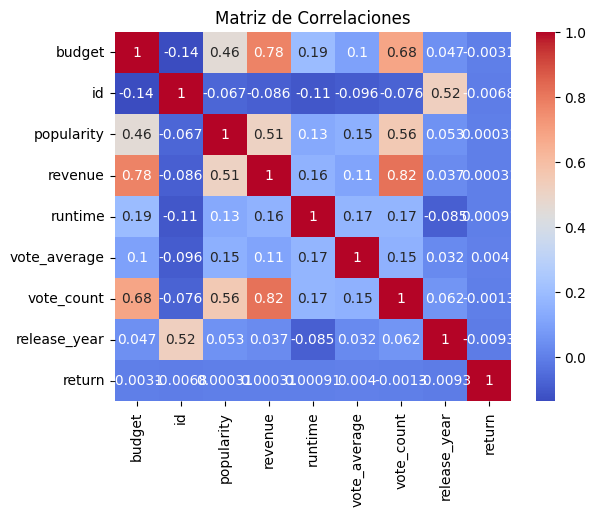

In [78]:
# Implemento un manejo de errores específico para poder hacer un mapa de calor de correlaciones seleccionando únicamente valores numéricos
df_peliculas = df_peliculas.select_dtypes(include=np.number)  
df_peliculas.fillna(df_peliculas.mean(), inplace=True)

# Calculo la correlación
correlation_matrix = df_peliculas.corr()

# Grafico para visualizar
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlaciones')
plt.show()

In [35]:
df_modelo.head()

,genres,id,original_language,overview,popularity,title,vote_average,release_year,return
4,"[Crime, Comedy]",5.0,en,It's Ted the Bellhop's first night on the job....,9.026586,Four Rooms,6.5,1995.0,1.075000
11,"[Animation, Family]",12.0,en,"Nemo, an adventurous young clownfish, is unexp...",25.497794,Finding Nemo,7.6,2003.0,10.003570
12,"[Comedy, Drama, Romance]",13.0,en,A man with a low IQ has accomplished great thi...,48.307194,Forrest Gump,8.2,1994.0,12.326280
13,[Drama],14.0,en,"Lester Burnham, a depressed suburban father in...",20.726578,American Beauty,7.9,1999.0,23.753107
15,"[Drama, Crime, Music]",16.0,en,"Selma, a Czech immigrant on the verge of blind...",10.684806,Dancer in the Dark,7.7,2000.0,3.127491


In [36]:
df_modelo.to_parquet("C:/Users/jugas/Proyecto/Proyecto/data/df_modelo.parquet")